## Page -- > Top Products
--> Total categories = 7 (Each product must contain 300-500 records)

--> Data Preprocessing

--> Using **POPULARITY BASED RECOMMENDATION SYSTEM**

--> Pick top 10 products from each category (ratings wise)

**Output** --> One dataframe having 50 products

**Output** --> One dataframe having all products

DataSets Used (https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset)

1.   Air Conditioners
2.   Refrigerators
3.   Televisions
4.   Home Decor
5.   Jewellery
6.   Snack Foods
7.   Sun Glasses

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Sunglasses.csv")

In [ ]:
df.shape

(238, 9)

In [ ]:
df.isnull().sum()

name                 0
main_category        0
sub_category         0
image                0
link                 0
ratings           1021
no_of_ratings     1021
discount_price     348
actual_price       153
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df['no_of_ratings'].nunique

<bound method IndexOpsMixin.nunique of 0                                       132
1                                       153
2                                         7
3                                       100
4                                         7
                       ...                 
233    Usually dispatched in 11 to 12 days.
234     Usually dispatched in 3 to 4 weeks.
235                                     120
236     Usually dispatched in 3 to 4 weeks.
237     Usually dispatched in 3 to 4 weeks.
Name: no_of_ratings, Length: 238, dtype: object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            238 non-null    object
 1   main_category   238 non-null    object
 2   sub_category    238 non-null    object
 3   image           238 non-null    object
 4   link            238 non-null    object
 5   ratings         238 non-null    object
 6   no_of_ratings   238 non-null    object
 7   discount_price  238 non-null    object
 8   actual_price    238 non-null    object
dtypes: object(9)
memory usage: 16.9+ KB


In [ ]:
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',',"")

In [ ]:
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'],errors='coerce')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['no_of_ratings'] = df['no_of_ratings'].astype(int)

In [ ]:
df.shape

(175, 9)

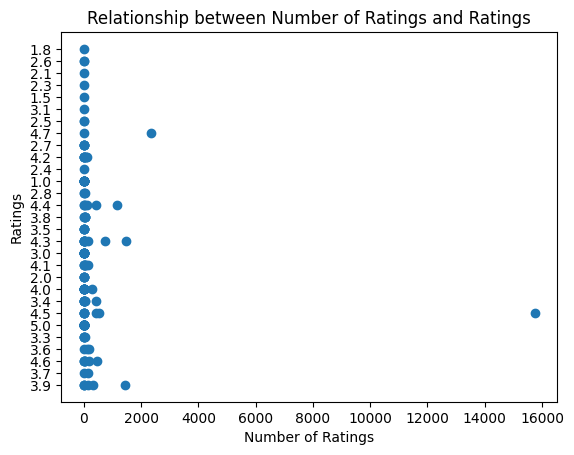

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame called 'df'
plt.scatter(df['no_of_ratings'], df['ratings'])
plt.xlabel('Number of Ratings')
plt.ylabel('Ratings')
plt.title('Relationship between Number of Ratings and Ratings')
plt.show()

In [ ]:
df["ratings"] = pd.to_numeric(df['ratings'],errors = 'coerce')

In [ ]:
df['ratings'].round().astype(int)

0      4
1      4
2      5
3      4
4      3
      ..
206    3
207    4
208    4
209    1
235    4
Name: ratings, Length: 175, dtype: int64

In [ ]:
df['ratings']=df['ratings'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            175 non-null    object
 1   main_category   175 non-null    object
 2   sub_category    175 non-null    object
 3   image           175 non-null    object
 4   link            175 non-null    object
 5   ratings         175 non-null    int64 
 6   no_of_ratings   175 non-null    int64 
 7   discount_price  175 non-null    object
 8   actual_price    175 non-null    object
dtypes: int64(2), object(7)
memory usage: 13.7+ KB


In [ ]:
df = pd.read_csv("/content/top_10_ac.csv")

In [ ]:
df['actual_price'] = df['actual_price'].str.replace(",","")

In [ ]:
df['actual_price']=df['actual_price'].str.replace("₹","")

In [ ]:
df['actual_price']=df['actual_price'].str.replace(".","")

<ipython-input-93-d1935a06ca5d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['actual_price']=df['actual_price'].str.replace(".","")


In [ ]:
df['actual_price']=df['actual_price'].astype(int)

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            10 non-null     object
 1   main_category   10 non-null     object
 2   sub_category    10 non-null     object
 3   image           10 non-null     object
 4   link            10 non-null     object
 5   ratings         10 non-null     int64 
 6   no_of_ratings   10 non-null     int64 
 7   discount_price  10 non-null     object
 8   actual_price    10 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 848.0+ bytes


In [ ]:
df.shape

(175, 9)

In [ ]:
n = 10690
df.drop(df.tail(n).index,inplace = True)

In [ ]:
df.to_csv("sunglasses.csv")

In [ ]:
# Filter products based on the condition
filtered_df = df[(df['ratings'] >= 4) & (df['no_of_ratings'] > 100)]

# Sort the filtered DataFrame by 'no_of_ratings' in descending order
sorted_df = filtered_df.sort_values('no_of_ratings', ascending=False)

# Take the top 10 products
top_10_products = sorted_df.head(10)

# Print the top 10 products
print(top_10_products)

                                                  name main_category  \
35   FEISEDY Polarized Women Square Sunglasses Spar...   accessories   
181  Clout Goggle Heart Sunglasses Vintage Cat Eye ...   accessories   
130  SOJOS TR90 Ultralight Polarized Women Sunglass...   accessories   
28   Kimorn Cat Eye Sunglasses Women Clout Goggles ...   accessories   
150  Womens Bi-focal Gothic Cat Eye Reading Sunglasses   accessories   
73   Locs - Official LOCS Hardcore Gangsta Shades S...   accessories   
70        Prada Men Rectangular Sunglasses - Pack of 1   accessories   
191                          COACH Womens 0HC8232 56mm   accessories   
192  RIVBOS Polarized Sports Sunglasses Driving Sun...   accessories   
9    Fastrack Women's Round Sunglasses Black Frame,...   accessories   

    sub_category                                              image  \
35    Sunglasses  https://m.media-amazon.com/images/I/61x0HTu7Ss...   
181   Sunglasses  https://m.media-amazon.com/images/I/516uxRED6C.

In [ ]:
top_10_products.reset_index(drop = True)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,FEISEDY Polarized Women Square Sunglasses Spar...,accessories,Sunglasses,https://m.media-amazon.com/images/I/61x0HTu7Ss...,https://www.amazon.in/FEISEDY-Polarized-Sungla...,4,15750,"₹1,249",2082
1,Clout Goggle Heart Sunglasses Vintage Cat Eye ...,accessories,Sunglasses,https://m.media-amazon.com/images/I/516uxRED6C...,https://www.amazon.in/Goggle-Sunglasses-Vintag...,4,2345,"₹3,685",5269
2,SOJOS TR90 Ultralight Polarized Women Sunglass...,accessories,Sunglasses,https://m.media-amazon.com/images/I/61aJN8x6KH...,https://www.amazon.in/SOJOS-Ultralight-Polariz...,4,1453,"₹5,698",8139
3,Kimorn Cat Eye Sunglasses Women Clout Goggles ...,accessories,Sunglasses,https://m.media-amazon.com/images/I/51fA-g7QFt...,https://www.amazon.in/Kimorn-Sunglasses-Goggle...,4,1163,₹299,499
4,Womens Bi-focal Gothic Cat Eye Reading Sunglasses,accessories,Sunglasses,https://m.media-amazon.com/images/I/71HS1HNlRf...,https://www.amazon.in/Womens-Bi-focal-Reading-...,4,728,"₹3,938",5629
5,Locs - Official LOCS Hardcore Gangsta Shades S...,accessories,Sunglasses,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Locs-Official-Hardcore-G...,4,517,"₹2,550",4499
6,Prada Men Rectangular Sunglasses - Pack of 1,accessories,Sunglasses,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PRADA-01OS-Prada-Rectang...,4,474,"₹21,361",29999
7,COACH Womens 0HC8232 56mm,accessories,Sunglasses,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/COACH-0HC8232-Tortoise-B...,4,427,"₹24,743",35349
8,RIVBOS Polarized Sports Sunglasses Driving Sun...,accessories,Sunglasses,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RIVBOS-Polarized-Sunglas...,4,405,"₹6,395",9139
9,"Fastrack Women's Round Sunglasses Black Frame,...",accessories,Sunglasses,https://m.media-amazon.com/images/I/613RPRB0od...,https://www.amazon.in/Fastrack-Gradient-Goggle...,4,278,"₹1,879",1999


In [ ]:
top_10_products.to_csv("top_10_ac.csv")

Merging Datasets

In [ ]:
import pandas as pd
# Define the list of dataset filenames
dataset_files = ['/content/air_conditioners.csv', '/content/home_dcor.csv', '/content/jewellery.csv', '/content/refrigerators.csv', '/content/snack_foods.csv', '/content/sunglasses.csv','/content/televisions.csv']

# Create an empty list to store the individual datasets
datasets = []

# Load each dataset into a pandas DataFrame
for file in dataset_files:
    dataset = pd.read_csv(file)
    datasets.append(dataset)

# Perform the merge
merged_dataset = pd.concat(datasets, axis=0, ignore_index=True)

# Validate and process the merged dataset as needed
# ...

# Save the merged dataset to a file
merged_dataset.to_csv('all_products.csv', index=False)


In [ ]:
import pandas as pd

# Assuming you already have a DataFrame called 'top_products'

# Shuffle the dataset randomly
shuffled_df = merged_dataset.sample(frac=1, random_state=1000)

# Reset the index of the shuffled DataFrame
shuffled_df = shuffled_df.reset_index(drop=True)

# Print the shuffled DataFrame
shuffled_df

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,477,Wall1ders 9 Curve Square 4 Inch Mirror Wall De...,home & kitchen,Home Décor,https://m.media-amazon.com/images/I/612eUrNSnt...,https://www.amazon.in/Wall1ders-Decorative-Ref...,3,47,₹199,1050
1,31,"Whirlpool 1.0 Ton 3 Star, Flexicool Inverter S...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51vyGNOskV...,https://www.amazon.in/Whirlpool-Flexicool-Inve...,3,925,"₹29,990",57700
2,30,"Samsung 1.5 Ton 3 Star Wi-fi Enabled, Wind-Fre...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/71kIl8z3SJ...,https://www.amazon.in/Samsung-Technology-Conve...,3,15,"₹37,699",62990
3,61,Kundan 24k (999.9) Lord Ganesh 8 gm Yellow Gol...,accessories,Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Kundan-999-9-Yellow-Gane...,4,55,"₹51,824",59550
4,53,realme Smart Tv Stick 4K,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/I/41ZRGefE8q...,https://www.amazon.in/Realme-Smart-TV-Stick-4K...,3,279,"₹3,067",4699
...,...,...,...,...,...,...,...,...,...,...
3961,44,Izaan Mart Women Retro Driving Rectangular Sun...,accessories,Sunglasses,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Izaan-Mart-Driving-Recta...,2,1,₹198,299
3962,323,Acer 106.8 cm (42 inches) P series Full HD And...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/I/61KKL1xN8X...,https://www.amazon.in/Acer-106-8-inches-Androi...,4,342,"₹21,999",29990
3963,163,Haier 345 L 3 Star Triple Inverter Frost Free ...,appliances,Refrigerators,https://m.media-amazon.com/images/I/41KOqlQ51p...,https://www.amazon.in/Haier-Refrigerator-Conve...,3,96,"₹32,990",52400
3964,279,Aarushi Creations Wood Personalised Home Door ...,home & kitchen,Home Décor,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Personalised-Acrylic-Emb...,4,50,₹664,1800


In [ ]:
shuffled_df=shuffled_df.drop(['Unnamed: 0'],axis=1)

In [ ]:
shuffled_df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [ ]:
shuffled_df.to_csv("all_sproducts.csv")

#Pickle

In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/all_products.csv")
df2 = pd.read_csv("/content/all_sproducts.csv")

In [ ]:
import pickle
pickle.dump(df1,open('all_products.pkl','wb'))
pickle.dump(df2,open('all_sproducts.pkl','wb'))